In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

C:\Users\maike\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\maike\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\maike\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def download_dados(tickers, interval = '1d', period = 'max'):
    
    df = yf.download(tickers, interval=interval, period=period)['Adj Close']
    #retorno, df_ln = coin.calc_ret_ln(df)

    return df

In [3]:
ativos = pd.read_csv('ativos.csv', sep=';')
ativos = ativos.iloc[:-40]
ativos.drop([425, 506, 561, 681], inplace=True)

In [ ]:
tickers = ' '
for i in range(len(ativos)):
    aux = ativos.iloc[i][1]
    tickers = tickers +' '+ aux
tickers

In [ ]:
#tickers = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA  BRAP4.SA  BRFS3.SA BRKM5.SA BRML3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SULA11.SA SUZB3.SA TAEE11.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA WEGE3.SA YDUQ3.SA"

In [5]:
from mlpairs import OpticsPairs
import pandas as pd

import pickle
with open('close_price.pickle', 'rb') as cp:
    stock_prices = pickle.load(cp)
#stock_prices = yf.download(tickers, interval='1d', period='3y')['Adj Close']
#stock_prices = pd.read_csv('stock_prices.csv', index_col='Date')
train = stock_prices[:int(len(stock_prices)/0.7)]
test = stock_prices[int(len(stock_prices)*0.7):]

train.head()

C:\Users\maike\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\maike\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


,ETHBTC,LTCBTC,BNBBTC,NEOBTC,QTUMETH,EOSETH,SNTETH,BNTETH,GASBTC,BNBETH,...,1INCHBTC,1INCHUSDT,REEFBTC,REEFUSDT,OGBTC,OGUSDT,ATMBTC,ATMUSDT,ASRBTC,ASRUSDT
2021-01-01,0.024850,0.004303,0.001287,0.000492,0.003104,0.003620,0.000043,0.001780,0.000053,0.051798,...,0.000039,1.1550,4.100000e-07,0.012224,0.000214,6.270,0.000343,10.009,0.000241,7.111
2021-01-02,0.024062,0.004255,0.001189,0.000448,0.002894,0.003394,0.000040,0.001646,0.000048,0.049361,...,0.000032,1.0250,3.500000e-07,0.011317,0.000174,5.628,0.000302,9.746,0.000181,5.826
2021-01-03,0.029640,0.004885,0.001249,0.000486,0.002530,0.002867,0.000035,0.001436,0.000047,0.042113,...,0.000034,1.1080,3.000000e-07,0.009871,0.000144,4.700,0.000242,7.982,0.000154,5.091
2021-01-04,0.032551,0.004855,0.001284,0.000512,0.002421,0.002708,0.000034,0.001352,0.000047,0.039448,...,0.000032,1.0317,3.100000e-07,0.010121,0.000139,4.451,0.000228,7.280,0.000152,4.861
2021-01-05,0.032393,0.004669,0.001232,0.000498,0.002384,0.002624,0.000035,0.001435,0.000045,0.037931,...,0.000037,1.2501,3.200000e-07,0.010981,0.000118,4.000,0.000213,7.313,0.000128,4.363


In [6]:
int(len(stock_prices)*0.7)

259

In [7]:
for i in range(len(train)):
    for j in range(len(train.columns)):
        try:
            if np.isnan(train.iloc[i][j]) == True and np.isnan(train.iloc[i+1][j]) == True:
                train.iloc[i][j] = 0
            elif np.isnan(train.iloc[i][j]) == True and train.iloc[i+1][j] > 0:
                train.iloc[i][j] = (train.iloc[i-1][j]+train.iloc[i+1][j])/2
        except:
            pass

In [8]:
op = OpticsPairs(train)
op.returns.head()
#op.returns.dropna(inplace=True, axis=1)

,ETHBTC,LTCBTC,BNBBTC,NEOBTC,QTUMETH,EOSETH,SNTETH,BNTETH,GASBTC,BNBETH,...,1INCHBTC,1INCHUSDT,REEFBTC,REEFUSDT,OGBTC,OGUSDT,ATMBTC,ATMUSDT,ASRBTC,ASRUSDT
2021-01-02,-0.031710,-0.011155,-0.076606,-0.089431,-0.067655,-0.062431,-0.072919,-0.075281,-0.098485,-0.047048,...,-0.189059,-0.112554,-0.146341,-0.074198,-0.184075,-0.102392,-0.119673,-0.026276,-0.250932,-0.180706
2021-01-03,0.231818,0.148061,0.050820,0.084821,-0.125777,-0.155274,-0.108751,-0.127582,-0.021008,-0.146837,...,0.052087,0.080976,-0.142857,-0.127772,-0.174512,-0.164890,-0.197613,-0.180997,-0.148148,-0.126159
2021-01-04,0.098212,-0.006141,0.028185,0.053498,-0.043083,-0.055459,-0.024404,-0.058496,0.000000,-0.063282,...,-0.037280,-0.068863,0.033333,0.025327,-0.034771,-0.052979,-0.055785,-0.087948,-0.014276,-0.045178
2021-01-05,-0.004854,-0.038311,-0.040651,-0.027344,-0.015283,-0.031019,0.009599,0.061391,-0.034335,-0.038456,...,0.144052,0.211689,0.032258,0.084972,-0.149135,-0.101326,-0.066958,0.004533,-0.159974,-0.102448
2021-01-06,0.014818,-0.015635,-0.067376,0.066265,0.061661,0.064787,0.354365,-0.086411,-0.022222,-0.077272,...,0.111833,0.207903,-0.093750,-0.058920,-0.098222,-0.025000,-0.132270,-0.072884,-0.116771,-0.037360


In [9]:
import numpy as np
for i in range(len(op.returns)):
    for j in range(len(op.returns.columns)):
        try:
            if np.isnan(op.returns.iloc[i][j]) == True and np.isnan(op.returns.iloc[i-1][j]) == True:
                op.returns.iloc[i][j] = 0
        except:
            pass
        if np.isnan(op.returns.iloc[i][j]) == True and op.returns.iloc[i-1][j] != 0:
            op.returns.iloc[i][j] = op.returns.iloc[i-1][j]
        elif op.returns.iloc[i][j] == -np.inf or op.returns.iloc[i][j] == np.inf:
            op.returns.iloc[i][j] = (op.returns.iloc[i-1][j]+op.returns.iloc[i-2][j])/2

In [10]:
op.returns.fillna(0, inplace=True)

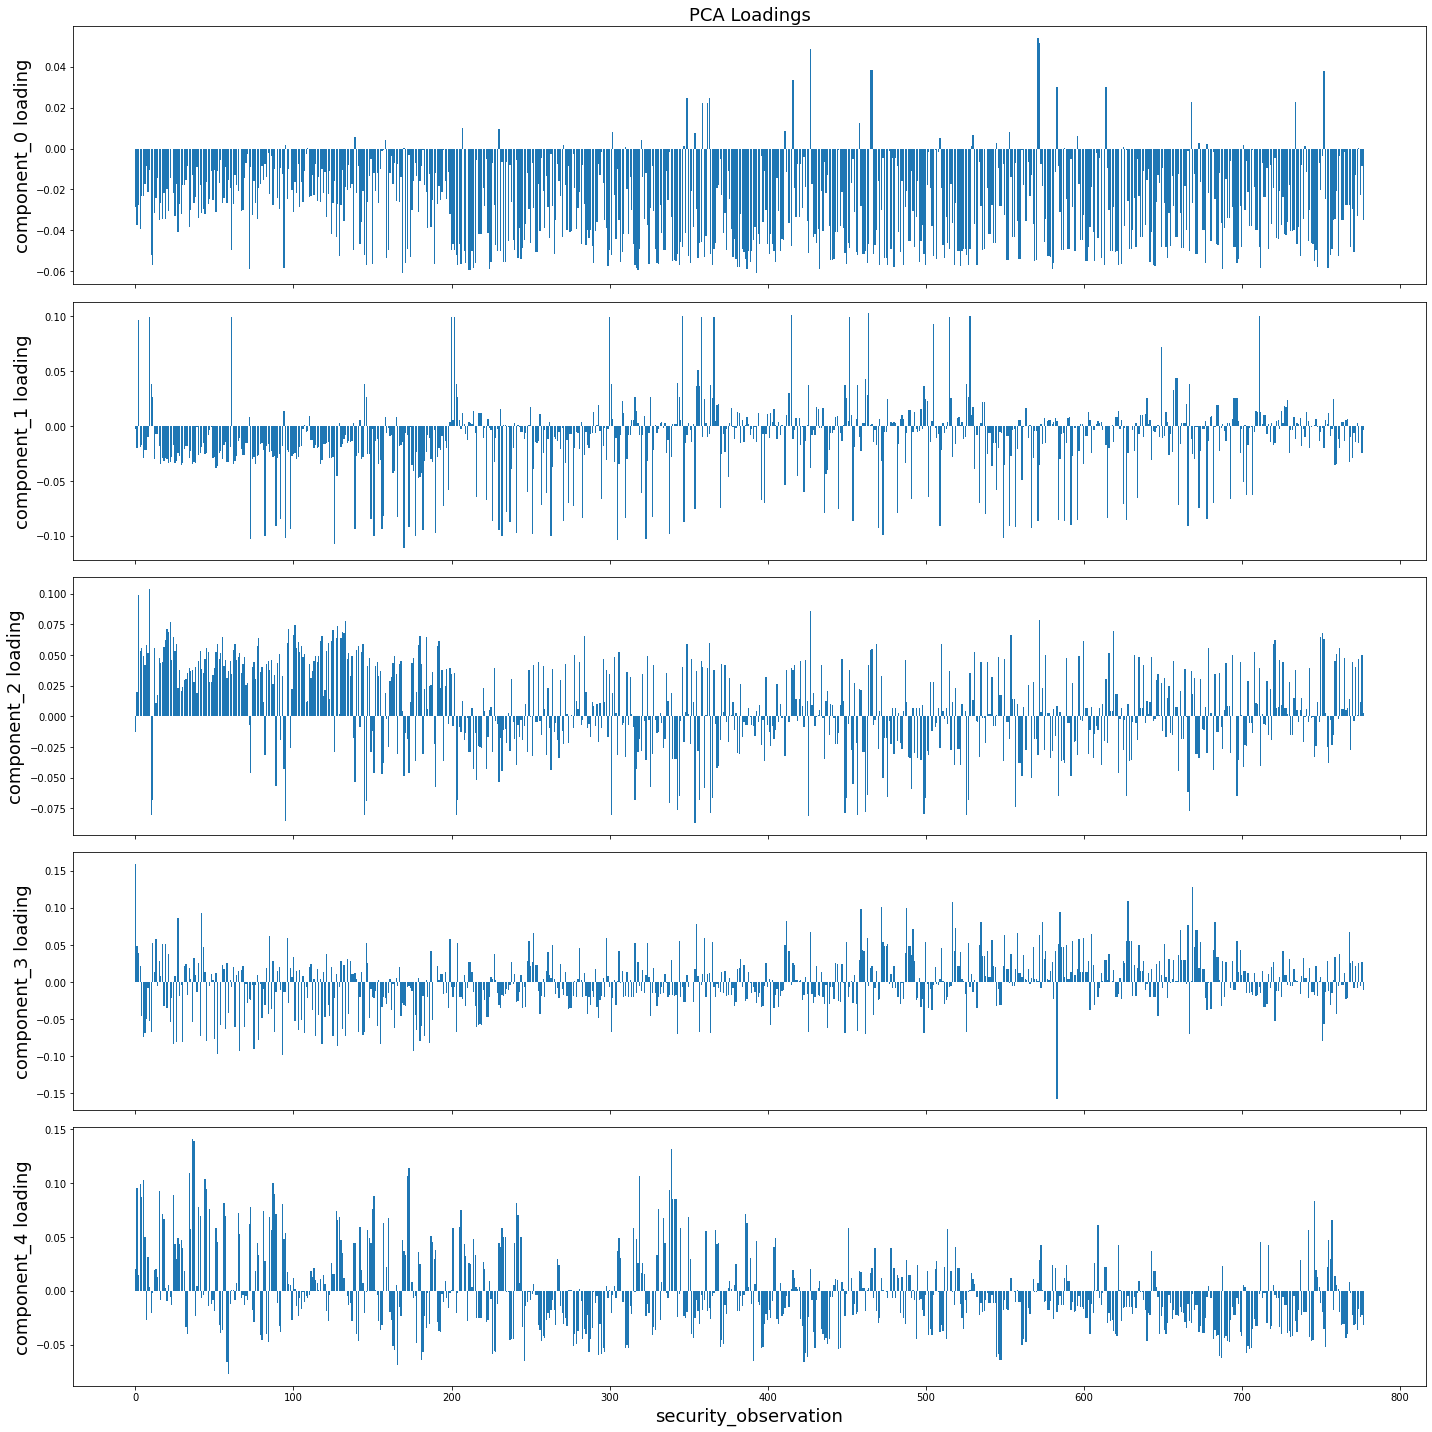

In [11]:
op.reduce_PCA()
op.plot_loadings()

In [12]:
op.find_pairs()
op.pairs

Found 930 potential pairs


0       (SXPBUSD, SXPUSDT)
1        (SXPBUSD, SXPAUD)
2        (SXPBUSD, SXPEUR)
3       (SXPBUSD, SXPBIDR)
4        (SXPBUSD, SXPTRY)
              ...         
925    (XRPGBP, XRPUPUSDT)
926       (XRPGBP, XRPBRL)
927    (XRPAUD, XRPUPUSDT)
928       (XRPAUD, XRPBRL)
929    (XRPUPUSDT, XRPBRL)
Length: 930, dtype: object

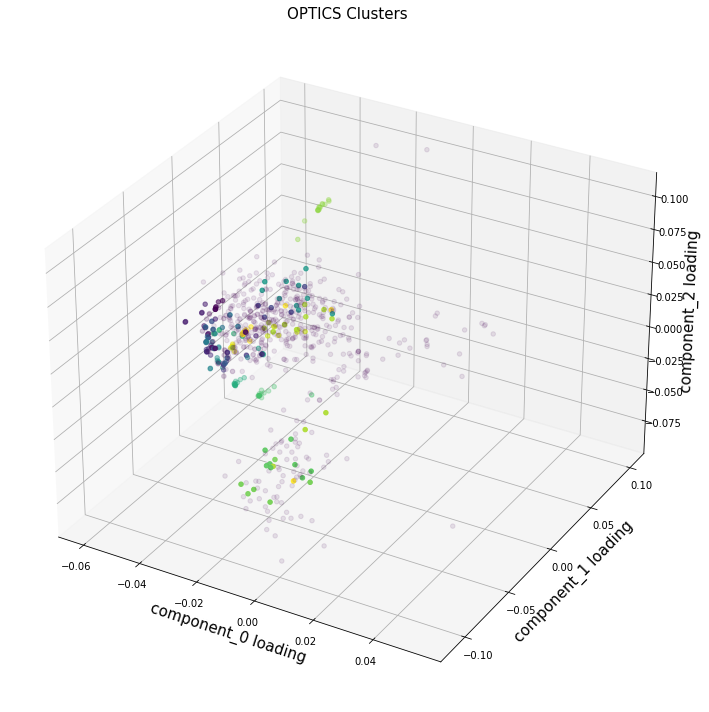

In [13]:
op.plot_clusters(n_dimensions=3)

In [14]:
op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()

c:\Users\maike\OneDrive\Documentos\GitHub\retorno_10\mlpairs.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  security_0.fillna(0, inplace=True)
c:\Users\maike\OneDrive\Documentos\GitHub\retorno_10\mlpairs.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  security_1.fillna(0, inplace=True)
c:\Users\maike\OneDrive\Documentos\GitHub\retorno_10\mlpairs.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  security_0.fillna(0, inp

In [15]:
op.filter_pairs()
op.filtered_pairs

Found 45 tradable pairs!


,pair,pvalue,hurst_exp,half_life,avg_cross_count
3,"(SXPBUSD, SXPBIDR)",2.451165e-02,0.171156,4.485111,31.329730
8,"(SXPUSDT, SXPBIDR)",2.380796e-02,0.173925,4.565872,29.967568
27,"(ALGOUSDT, EGLDBUSD)",1.653104e-02,0.153957,9.488695,29.286486
28,"(ALGOUSDT, EGLDUSDT)",1.656011e-02,0.153681,9.492091,29.286486
40,"(ALGOBUSD, EGLDBUSD)",1.678131e-02,0.154085,9.511177,29.286486
41,"(ALGOBUSD, EGLDUSDT)",1.680578e-02,0.153807,9.514127,29.286486
64,"(ONTUSDT, ZILBIDR)",9.115775e-03,0.111250,6.321494,21.113514
71,"(ZILUSDT, ZILBIDR)",1.836039e-03,0.120926,3.380440,38.821622
80,"(LSKUSDT, FLMBUSD)",2.579905e-03,0.097931,5.957807,38.821622
81,"(LSKUSDT, FLMUSDT)",2.545804e-03,0.098774,6.060512,34.735135


In [16]:
#for i in op.filtered_pairs.index:
    #op.plot_pair_price_spread(idx=i)

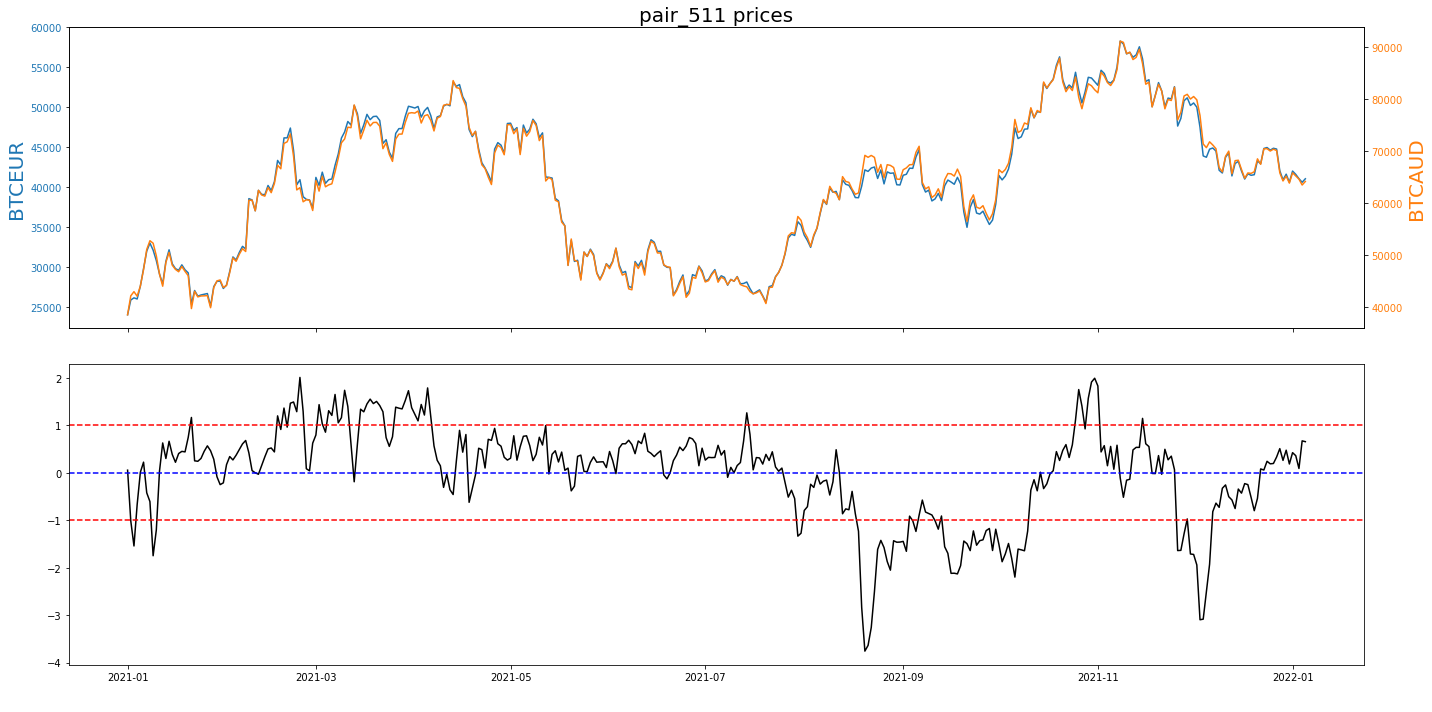

In [17]:
op.plot_pair_price_spread(idx=511)

In [18]:
op.alpha

-3.699095614425443

In [19]:
op.norm_spreads

,0,1,2,3,4,5,6,7,8,9,...,920,921,922,923,924,925,926,927,928,929
2021-01-01,-1.097089,0.719650,0.920614,0.548407,0.152322,-0.070976,0.673388,0.862906,0.619533,0.144221,...,-0.620527,0.115875,0.934554,0.030566,-0.450291,1.000188,-0.327509,0.900042,-0.052690,1.076422
2021-01-02,-0.260306,0.720651,1.076945,0.141539,0.185124,0.292159,0.710180,1.066944,0.158341,0.183266,...,-0.829003,0.592127,0.896457,0.265918,-0.386227,0.949886,-0.201069,0.845470,-0.001489,1.013692
2021-01-03,-0.546168,0.764685,1.324256,0.321670,0.220377,0.058002,0.742012,1.299099,0.357065,0.216388,...,-0.919246,0.561677,0.913506,0.336730,-0.473710,0.961880,-0.182066,0.863410,0.065378,1.024001
2021-01-04,0.731820,0.619215,0.901912,0.677549,0.160342,-0.163879,0.651120,0.947112,0.630747,0.165885,...,-0.806350,0.550669,0.908140,0.269841,-0.388012,0.961662,-0.182875,0.858966,0.015002,1.023336
2021-01-05,-0.771943,0.844182,0.977690,0.441596,0.199146,-0.008998,0.811903,0.938496,0.491656,0.193472,...,-0.734960,0.067470,0.868076,0.246223,-0.566160,0.925467,-0.160809,0.835527,0.136817,0.984729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,-0.685809,-1.101116,-1.471058,-0.223432,-2.678275,-1.059814,-1.131131,-1.515236,-0.179365,-2.683566,...,0.673875,-0.554185,-1.013977,-0.069532,0.272570,-1.012607,0.372104,-0.983598,0.106691,-1.068525
2022-01-02,0.905274,-1.049326,-1.458531,-0.417830,-2.608500,-1.069706,-1.011234,-1.413032,-0.476609,-2.601912,...,0.599448,-0.562354,-1.024533,-0.042394,0.208759,-1.029051,0.352044,-0.993498,0.131822,-1.083771
2022-01-03,-0.396415,-1.007199,-1.519346,-0.035817,-2.325371,-0.946778,-1.024739,-1.547320,-0.010297,-2.328466,...,0.702619,-0.145552,-1.003657,0.108313,0.494716,-0.998493,0.592417,-0.987817,0.131082,-1.074506
2022-01-04,-0.405152,-0.712629,-1.386181,-0.124970,-2.348435,-1.044742,-0.730344,-1.414110,-0.098963,-2.351593,...,1.024696,-0.770223,-1.000282,0.147983,0.449458,-0.974252,0.853351,-0.963411,0.346213,-1.074104


In [20]:
buy = 0
sell = 0

par = 26

for i in range(len(op.norm_spreads)):
    if buy == 0 and sell == 0:
        if op.norm_spreads[par][i] > 1:
            print('Entrada', op.alpha, op.beta, op.norm_spreads.index[i])
            print('compra', op.filtered_pairs.loc[par]['pair'][1], '\n', 'venda', op.filtered_pairs.loc[par]['pair'][0])
            sell = 1
    if buy == 0 and sell == 0:
        if op.norm_spreads[par][i] < -1:
            print('Entrada', op.alpha, op.beta, op.norm_spreads.index[i])
            print('compra', op.filtered_pairs.loc[par]['pair'][0], '\n', 'venda', op.filtered_pairs.loc[par]['pair'][1])
            buy = 1
    
    if buy == 1 and op.norm_spreads[par][i] > 0:
        buy = 0
        print('compra finalizada', op.norm_spreads.index[i])

    elif sell == 1 and op.norm_spreads[par][i] < 0:
        sell = 0
        print('venda finalizada', op.norm_spreads.index[i])

Entrada -3.699095614425443 1.9744623016395229 2021-02-12


KeyError: 26

In [ ]:
op.filtered_pairs.loc[136]['pair'][0]